In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)
from scipy.io import loadmat

OpenCV Version : 4.4.0 


In [2]:
#Leitura da imagem (.jpg):
image = cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_33.jpg"), cv2.COLOR_BGR2RGB)

In [3]:
#Leitura das anotações (.mat):
annots = loadmat('ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_33.mat')
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])

In [4]:
a = annots["image_info"]
type(a)

numpy.ndarray

In [5]:
#Função que recebe o id (inteiro) da imagem e retorna duas listas com as posições x e y, respectivamente, das anotações
def getGTpoints(number, part):
    
    #Abrindo o arquivo com as anotações em .mat:
    annots = loadmat('ShanghaiTech/part_{0}/train_data/ground-truth/GT_IMG_{1}.mat'.format(part, number))
    a = annots["image_info"]
    #Lendo o elemento do array que possui as anotações:
    ground_truth = a[0][0][0][0][0]
    #Cria duas listas, com a posição no eixo x e no eixo y de cada anotação:
    x = []
    y = []
    for e in ground_truth:
        x.append(e[0])
        y.append(e[1])
        
    #Retorna as listas x e y
    return x, y

Digite a parte do Dataset:A
Digite o id da Imagem:123


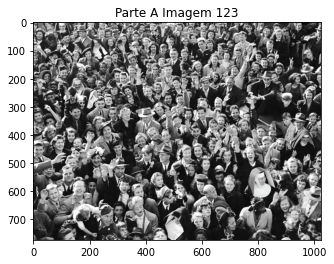

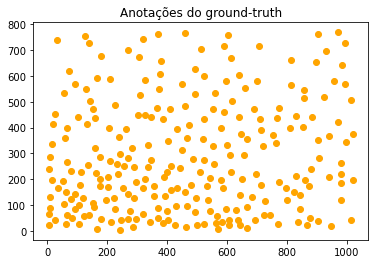

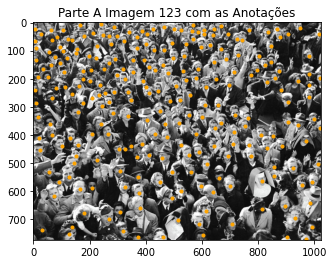

In [6]:
part = input("Digite a parte do Dataset:")
n = int(input("Digite o id da Imagem:"))
x, y = getGTpoints(n, "A")

#Plot da Imagem:
image = cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(n)), cv2.COLOR_BGR2RGB)
plt.title("Parte {0} Imagem {1}".format(part, n))
plt.imshow(image)
plt.show()

#Gráfico dos pontos com a posição de cada cabeça:
plt.plot(x, y, "o", color="orange")
plt.title("Anotações do ground-truth")
plt.show()

#Plot da imagem com as anotações:
plt.imshow(cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(n)), cv2.COLOR_BGR2RGB))
plt.plot(x, y, "o", markersize=3, color="orange")
plt.title("Parte {0} Imagem {1} com as Anotações".format(part, n))
plt.show()

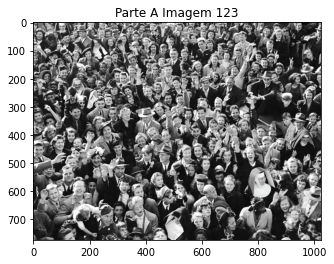

In [13]:
#Plot da Imagem:
img = cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(n))

image = cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(n)), cv2.COLOR_BGR2RGB)
plt.title("Parte {0} Imagem {1}".format(part, n))
plt.imshow(image)
plt.show()

In [99]:
n = 123
img = cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(n))
ry, rx = getRanges(img)
img.shape

(774, 1024, 3)

In [150]:
def imagem_recorta(img):
    range_y, range_x = getRanges(img)
    saida = []
    i = 0
    while i<2:
        patch = recorta([range_y[i],range_y[i+1]],[range_x[i],range_x[i+2]], img)
        saida.append(patch)
        i+=1    
    return saida
    
def recorta(y, x, img):
    #Preciso retornar 1 lista com os valores dos pixels de cada patch...
    saida = []
    x_min = x[0]
    x_max = x[1]
    y_min = y[0]
    y_max = y[1]
    
    for y in range(y_min,y_max):    
        lista = []
        for x in range(x_min,x_max):
            lista.append(img[y][x])
        saida.append(lista)
    return saida

def getRanges(img):
    height, width, chanel = img.shape
    heigh_ = divide_em_tres(height-1)
    width_ = divide_em_tres(width-1)
    return heigh_,width_
    
def divide_em_tres(value):
    v2 = int(value/3)
    v3 = int(2*value/3)
    v4 = int(value)
    return [0,v2,v3, value]

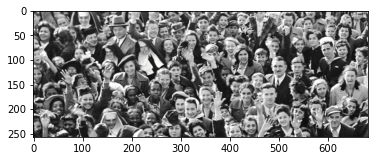

In [151]:
li = imagem_recorta(img)

plt.imshow(li[0])

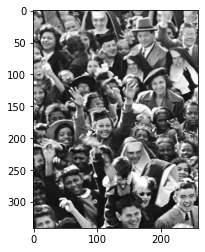

In [74]:
plt.imshow(li)

In [69]:
print(img[1])

[[237 237 237]
 [235 235 235]
 [215 215 215]
 ...
 [151 151 151]
 [132 132 132]
 [116 116 116]]
